<a href="https://colab.research.google.com/github/kataya1/Convolutional-neural-network/blob/master/pytourch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifardata', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./cifardata', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

100%|█████████▉| 169959424/170498071 [00:12<00:00, 16956602.77it/s]

Extracting ./cifardata/cifar-10-python.tar.gz to ./cifardata
Files already downloaded and verified


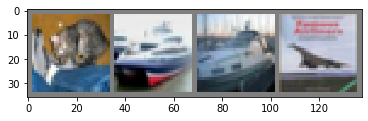

  cat  ship  ship plane


In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=0)
        #32x32x3 --> 28x28x6
        self.pool = nn.MaxPool2d(2, 2)
        #28x28x6 --> 14x14x6
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, padding=0)
        # 14x14x6 --> 10x10x16
        #and another pooling so 5x5x16
        # if you want k = 3 --> 30 to 15 to 13 to 6.5!!? so add padding 1 --> 32 to 16 to 16 to 8 
        # if you want k = 11 --> 22 to 11 to 1 to 0.5!!? so add padding 1 --> 24 to 12 to 2 to 1
        # hybrid 11x11 and 3x3 24 to 12 to 12 to 6
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x




In [0]:
def get_train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                           shuffle=True, num_workers=2)
    return(train_loader)

In [0]:

def trainNet(net, batch_size, n_epochs, learning_rate):
    start_time = time.time()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    trainloader = get_train_loader(batch_size)
    print("=" * 30)
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Finished Training, time = %.2f seconds' % (time.time() - start_time))

In [0]:
# net = Net()
# trainNet(net,4,2,0.001)

In [0]:
# newnet = Net()
# trainNet(newnet,4,2,0.001)

batch_size= 4
epochs= 2
learning_rate= 0.001
[1,  2000] loss: 2.131
[1,  4000] loss: 1.825
[1,  6000] loss: 1.665
[1,  8000] loss: 1.600
[1, 10000] loss: 1.519
[1, 12000] loss: 1.484
[2,  2000] loss: 1.411
[2,  4000] loss: 1.410
[2,  6000] loss: 1.378
[2,  8000] loss: 1.357
[2, 10000] loss: 1.340
[2, 12000] loss: 1.324
Finished Training, time = 432.99 seconds


In [0]:
# saving
# PATH = './cifar_nethybrid.pth'
# torch.save(net.state_dict(), PATH)
# loading
# net = Net()
# PATH = 'cifar_net.pth'
# net.load_state_dict(torch.load(PATH))
# net.eval()


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
#testing
def limitedtesting(net): 
    dataiter = iter(testloader)
    images, labels = dataiter.next()
    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                for j in range(4)))


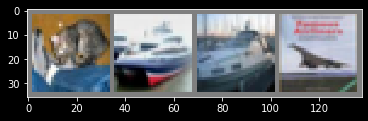

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship


In [0]:
limitedtesting(net)

In [0]:
def fulltesting(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))

In [0]:
fulltesting(net)

Accuracy of the network on the 10000 test images: 55 %


In [0]:
# newnet = Net()
# trainNet(newnet,10,5,0.001)

batch_size= 10
epochs= 5
learning_rate= 0.001
[1,  2000] loss: 2.184
[1,  4000] loss: 1.738
[2,  2000] loss: 1.515
[2,  4000] loss: 1.439
[3,  2000] loss: 1.324
[3,  4000] loss: 1.293
[4,  2000] loss: 1.219
[4,  4000] loss: 1.188
[5,  2000] loss: 1.127
[5,  4000] loss: 1.117
Finished Training, time = 1234.41 seconds


In [0]:
fulltesting(newnet)

Accuracy of the network on the 10000 test images: 59 %


In [0]:
class inceptionv1(nn.Module):
    def __init__(self):
        super(inceptionv1, self).__init__()
        self.b1_1x1conv = nn.Conv2d(3, 32, kernel_size=1, padding=0)

        self.b2_1x1conv = nn.Conv2d(3, 8, kernel_size=1, padding=0)
        self.b2_3x3conv = nn.Conv2d(8, 16, kernel_size=3, padding=1)

        self.b3_1x1conv = nn.Conv2d(3, 8, kernel_size=1, padding=0)
        self.b3_5x5conv = nn.Conv2d(8, 16, kernel_size=5, padding=2)

        self.b4_pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_1x1conv = nn.Conv2d(3, 16, kernel_size=1, padding=0)

        self.fc1 = nn.Linear(80 * 32 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        b1 = F.relu(self.b1_1x1conv(x))

        b2 = F.relu(self.b2_1x1conv(x))
        b2 = F.relu(self.b2_3x3conv(b2))

        b3 = F.relu(self.b3_1x1conv(x))
        b3 = F.relu(self.b3_5x5conv(b3))

        b4 = self.b4_pool(x)
        b4 = F.relu(self.b4_1x1conv(b4))

        conc = [b1, b2, b3, b4]
        
        y = torch.cat(conc, 1)
        y = y.view(-1,  80 * 32 * 32)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y  


In [0]:
# incet = inceptionv1()
# trainNet(incet,4,3,0.001)


batch_size= 4
epochs= 3
learning_rate= 0.001
[1,  2000] loss: 1.971
[1,  4000] loss: 1.708
[1,  6000] loss: 1.613
[1,  8000] loss: 1.552
[1, 10000] loss: 1.527
[1, 12000] loss: 1.479
[2,  2000] loss: 1.381
[2,  4000] loss: 1.373
[2,  6000] loss: 1.326
[2,  8000] loss: 1.304
[2, 10000] loss: 1.311
[2, 12000] loss: 1.286
[3,  2000] loss: 1.188
[3,  4000] loss: 1.183
[3,  6000] loss: 1.159
[3,  8000] loss: 1.157
[3, 10000] loss: 1.136
[3, 12000] loss: 1.143
Finished Training, time = 6031.41 seconds


In [0]:
fulltesting(incet)

Accuracy of the network on the 10000 test images: 60 %


In [0]:
class inceptionv2(nn.Module):
    def __init__(self):
        super(inceptionv2, self).__init__()
        self.b1_1x1conv = nn.Conv2d(3, 32, kernel_size=1, padding=0)

        self.b2_1x1conv = nn.Conv2d(3, 8, kernel_size=1, padding=0)
        self.b2_3x3conv = nn.Conv2d(8, 16, kernel_size=3, padding=1)

        self.b3_1x1conv = nn.Conv2d(3, 8, kernel_size=1, padding=0)
        self.b3_3x3conv = nn.Conv2d(8, 12, kernel_size=3, padding=1)
        self.b3_3x3_2conv = nn.Conv2d(12, 16, kernel_size=3, padding=1)


        self.b4_pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_1x1conv = nn.Conv2d(3, 16, kernel_size=1, padding=0)

        self.fc1 = nn.Linear(80 * 32 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        

    def forward(self, x):
        b1 = F.relu(self.b1_1x1conv(x))

        b2 = F.relu(self.b2_1x1conv(x))
        b2 = F.relu(self.b2_3x3conv(b2))

        b3 = F.relu(self.b3_1x1conv(x))
        b3 = F.relu(self.b3_3x3conv(b3))
        b3 = F.relu(self.b3_3x3_2conv(b3))


        b4 = self.b4_pool(x)
        b4 = F.relu(self.b4_1x1conv(b4))

        conc = [b1, b2, b3, b4]
        
        y = torch.cat(conc, 1)
        y = y.view(-1,  80 * 32 * 32)
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y  


In [0]:
incet2 = inceptionv2()
trainNet(incet2,4,3,0.001)

batch_size= 4
epochs= 3
learning_rate= 0.001
[1,  2000] loss: 1.970
[1,  4000] loss: 1.692
[1,  6000] loss: 1.601
[1,  8000] loss: 1.532
[1, 10000] loss: 1.504
[1, 12000] loss: 1.454
[2,  2000] loss: 1.377
[2,  4000] loss: 1.324
[2,  6000] loss: 1.295
[2,  8000] loss: 1.286
[2, 10000] loss: 1.256
[2, 12000] loss: 1.240
[3,  2000] loss: 1.137
[3,  4000] loss: 1.142
[3,  6000] loss: 1.119
batch_size= 4
epochs= 3
learning_rate= 0.001
[1,  2000] loss: 1.970
[1,  4000] loss: 1.692
[1,  6000] loss: 1.601
[1,  8000] loss: 1.532
[1, 10000] loss: 1.504
[1, 12000] loss: 1.454
[2,  2000] loss: 1.377
[2,  4000] loss: 1.324
[2,  6000] loss: 1.295
[2,  8000] loss: 1.286
[2, 10000] loss: 1.256
[2, 12000] loss: 1.240
[3,  2000] loss: 1.137
[3,  4000] loss: 1.142
[3,  6000] loss: 1.119
[3,  8000] loss: 1.122
[3,  8000] loss: 1.122
[3, 10000] loss: 1.092
[3, 10000] loss: 1.092
[3, 12000] loss: 1.098
[3, 12000] loss: 1.098
Finished Training, time = 5448.72 seconds
Finished Training, time = 5448.72 second

In [14]:
fulltesting(incet2)

Accuracy of the network on the 10000 test images: 59 %
